In [11]:
# Dino Dataset Machine Learning Project
# Name: Tyler Lovison
# Dataset: Dino.csv (1542 rows, 17 columns)
# Goal: Predict dinosaur weight using physical measurements.

# Project Description:
# This project analyzes the Dino dataset, which includes scientific names,
# physical characteristics, habitats, diet types, and other descriptive traits
# of various dinosaur species.
#
# The main objectives are:
# - Explore the dataset through visualizations
# - Preprocess the data by handling missing values and scaling numeric features
# - Train and compare two machine learning regression algorithms
# - Evaluate and determine which model predicts dinosaur weight most accurately

# Target Variable:
# - weight_kg (numeric)

# Features Used:
# - length_m
# - height_m
# These continuous variables are chosen because they have a strong
# direct relationship with weight.

# Machine Learning Models:
# 1. Linear Regression
# 2. Random Forest Regressor

# Evaluation Metrics:
# - R² Score
# - Mean Absolute Error (MAE)
# - Mean Squared Error (MSE)

### Importing Libraries

In [35]:
# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Loading the Dino.csv

In [8]:
# Load the dataset
df = pd.read_csv("Dino.csv")
# Shows how many total rows
print("Shows how many total rows:", df.shape[0])
# Show first few rows
df.head()


Shows how many total rows: 1542


,scientific_name,common_name,meaning,diet,length_m,weight_kg,height_m,locomotion,geological_period,lived_in,behavior_notes,first_discovered,fossil_location,notable_features,intelligence_level,source_link,row_index
0,Abelisaurus,Abelisaurus,Abel's lizard,Carnivore,7.0,1500.0,2.4,Bipedal,Late Cretaceous,Argentina,Large theropod,1985,Argentina,Short arms,Medium,https://en.wikipedia.org/wiki/Abelisaurus,0
1,Abrictosaurus,Abrictosaurus,Wakeful lizard,Herbivore,1.5,15.0,0.5,Bipedal,Early Jurassic,South Africa,Small herbivore,1974,South Africa,Unique teeth,Medium,https://en.wikipedia.org/wiki/Abrictosaurus,1
2,Abrosaurus,Abrosaurus,Delicate lizard,Herbivore,9.0,2000.0,4.5,Quadrupedal,Middle Jurassic,China,Delicate skull,1959,China,Delicate skull,Medium,https://en.wikipedia.org/wiki/Abrosaurus,2
3,Abydosaurus,Abydosaurus,Abydos lizard,Herbivore,18.0,30000.0,6.0,Quadrupedal,Early Cretaceous,USA,Basal sauropod,2010,USA,Complete skull,Medium,https://en.wikipedia.org/wiki/Abydosaurus,3
4,Acantholipan,Acantholipan,Spiny shield,Herbivore,5.0,2500.0,1.5,Quadrupedal,Late Cretaceous,Mexico,Armored nodosaur,2011,Mexico,Clubless armored tail,Medium,https://en.wikipedia.org/wiki/Acantholipan,4


### Basic Info and Statistics

In [36]:
# Drop rows with missing values in key columns
df_clean = df[['length_m','height_m','weight_kg']].dropna()

# Features and target
X = df_clean[['length_m','height_m']]
y = df_clean['weight_kg']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Visulizations

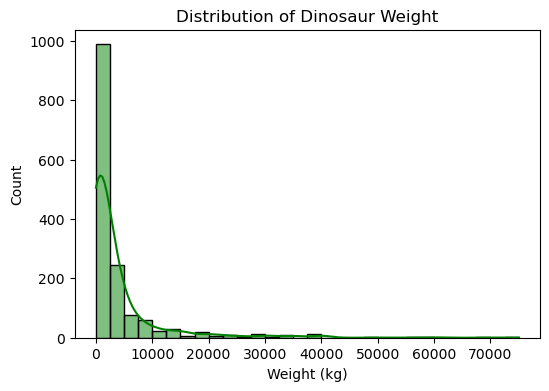

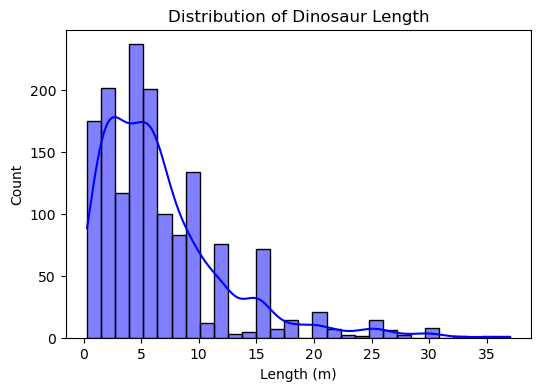

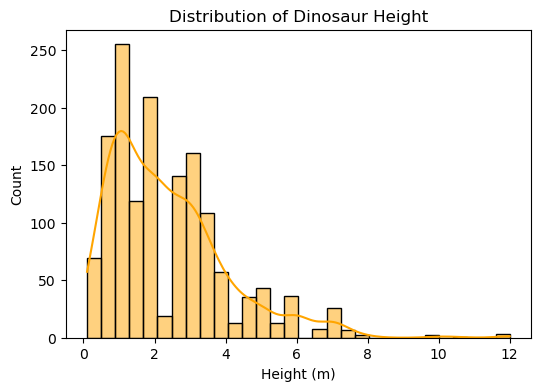

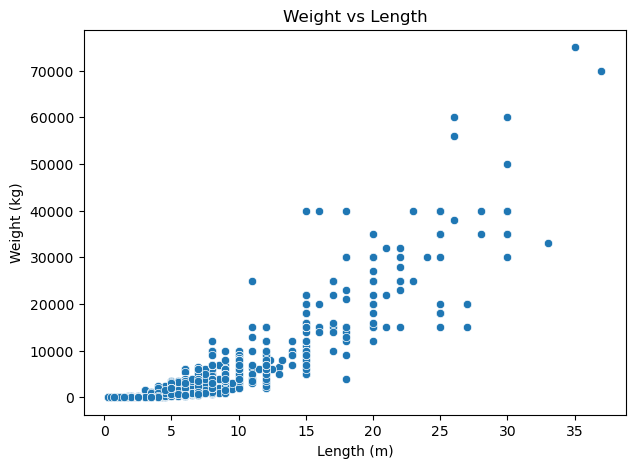

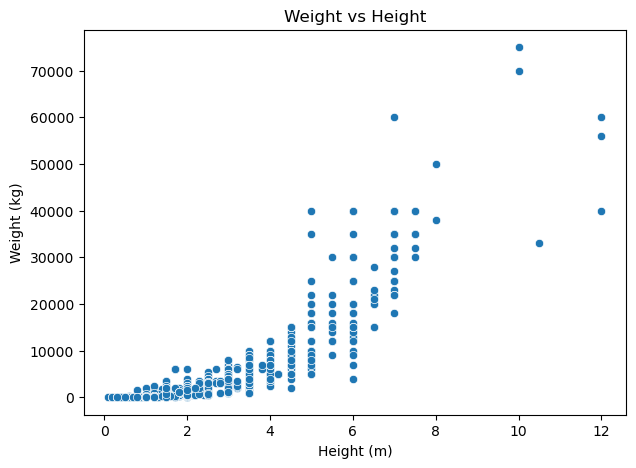

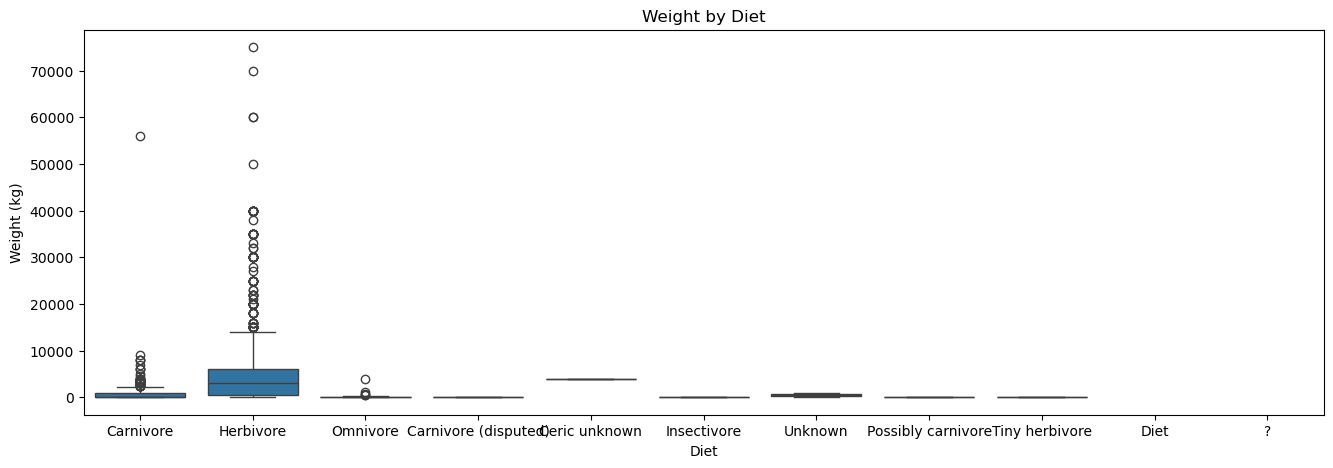

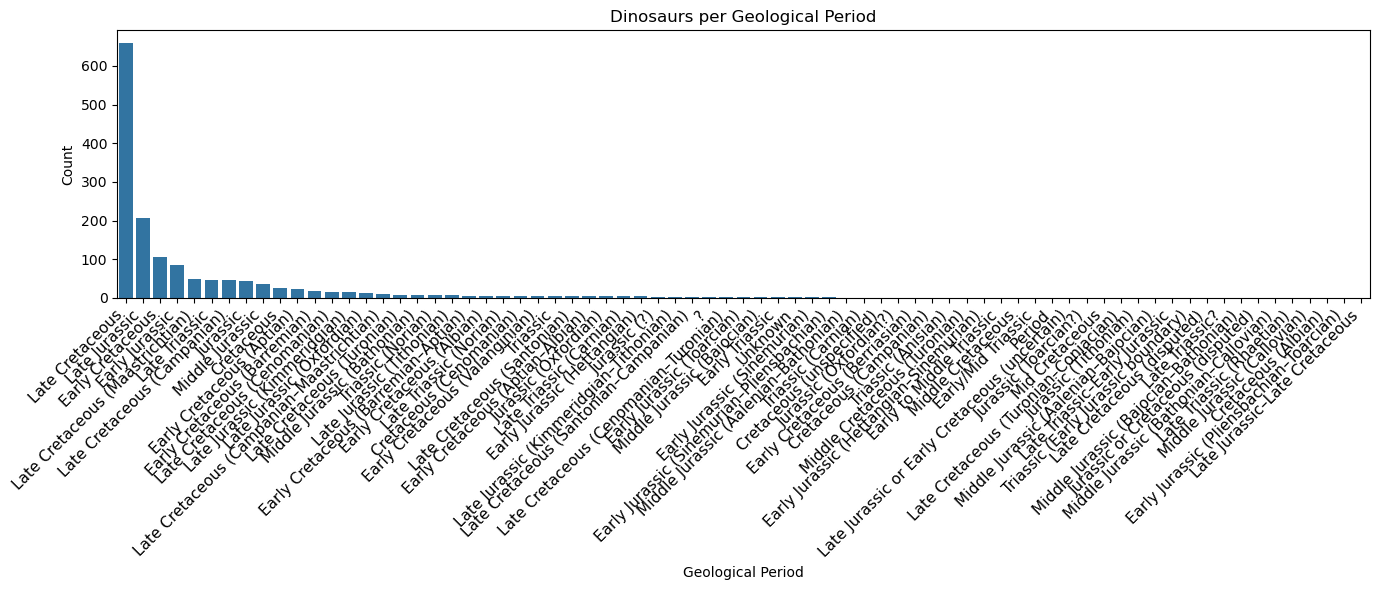

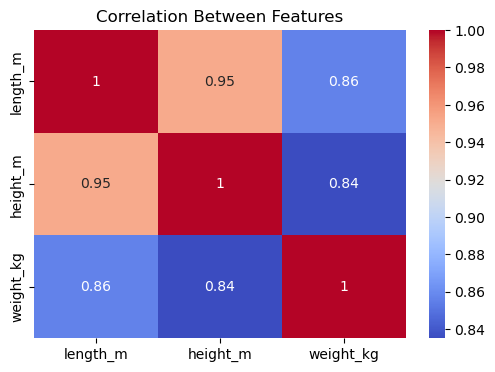

In [38]:
# Histograms
plt.figure(figsize=(6,4))
sns.histplot(df_clean['weight_kg'], bins=30, kde=True, color='green')
plt.title("Distribution of Dinosaur Weight")
plt.xlabel("Weight (kg)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_clean['length_m'], bins=30, kde=True, color='blue')
plt.title("Distribution of Dinosaur Length")
plt.xlabel("Length (m)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_clean['height_m'], bins=30, kde=True, color='orange')
plt.title("Distribution of Dinosaur Height")
plt.xlabel("Height (m)")
plt.show()

# Scatterplots
plt.figure(figsize=(7,5))
sns.scatterplot(x='length_m', y='weight_kg', data=df_clean)
plt.title("Weight vs Length")
plt.xlabel("Length (m)")
plt.ylabel("Weight (kg)")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='height_m', y='weight_kg', data=df_clean)
plt.title("Weight vs Height")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

# Boxplot for diet
plt.figure(figsize=(16,5))
sns.boxplot(x='diet', y='weight_kg', data=df)
plt.title("Weight by Diet")
plt.xlabel("Diet")
plt.ylabel("Weight (kg)")
plt.show()

# Countplot for geological period
plt.figure(figsize=(14,6))
sns.countplot(x='geological_period', data=df,
              order=df['geological_period'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title("Dinosaurs per Geological Period")
plt.xlabel("Geological Period")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_clean[['length_m','height_m','weight_kg']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

### Modeling

In [40]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


### Evaluation

In [41]:
def evaluate(true, pred, model_name):
    print(f"--- {model_name} ---")
    print("MAE:", mean_absolute_error(true, pred))
    print("MSE:", mean_squared_error(true, pred))
    print("R²:", r2_score(true, pred))
    print()

evaluate(y_test, lr_pred, "Linear Regression")
evaluate(y_test, rf_pred, "Random Forest")

--- Linear Regression ---
MAE: 2427.6221098991527
MSE: 12986599.169845814
R²: 0.7391551631381628

--- Random Forest ---
MAE: 1018.1730215044798
MSE: 4741291.660633656
R²: 0.9047678739015814



### Feature Importance (Random Forest)

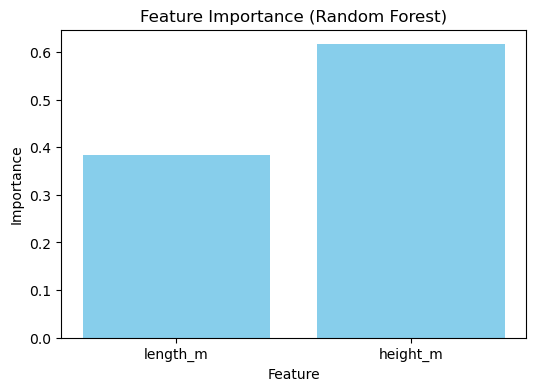

In [44]:
plt.figure(figsize=(6,4))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


### Predicted vs Actual Plot

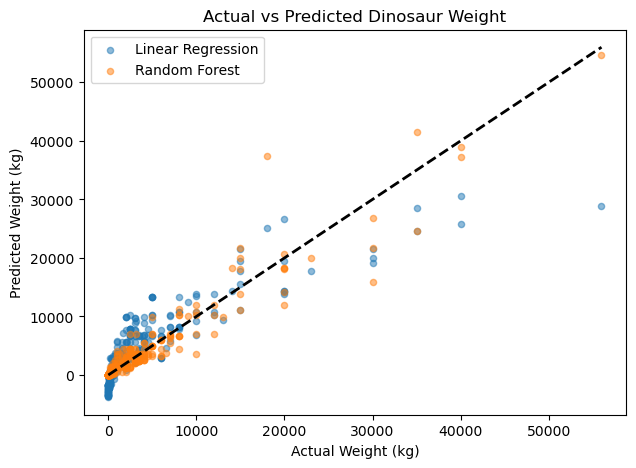

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, lr_pred, label="Linear Regression", alpha=0.5, s=20)
plt.scatter(y_test, rf_pred, label="Random Forest", alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Weight (kg)")
plt.ylabel("Predicted Weight (kg)")
plt.title("Actual vs Predicted Dinosaur Weight")
plt.legend()
plt.show()

In [ ]:
# Overall Conclusion
# In this project, I explored the Dino dataset to understand the physical characteristics,
# diet, habitats, and other traits of various dinosaurs. By performing data preprocessing,
# I handled missing values and scaled numeric features to prepare the data for machine learning models.

# Target Variable and Features
# - Target Variable: `weight_kg`
#   This numeric variable represents the weight of each dinosaur. Analyzing it showed a wide range of values,
#   from very small species to extremely large ones, which highlighted the importance of handling skewed distributions
#   and choosing models that can capture non-linear relationships.

# - Features Used: `length_m` and `height_m`
#   These were chosen because they have a strong biological relationship with weight. Scatterplots and correlation analysis
#   confirmed that both features are strongly correlated with weight, making them good predictors. Random Forest
#   feature importance further showed that `length_m` slightly contributes more than `height_m`, but both are essential
#   for accurate prediction.

# Key Findings from Visualizations
# - Most dinosaurs had smaller weights, but a few extremely large species caused skewed distributions.
# - Weight is strongly correlated with length and height.
# - Diet and locomotion also influence weight, as seen in boxplots and countplots.

# Modeling Insights
# - Linear Regression explained about 74% of the variance (R² ≈ 0.74).
# - Random Forest performed much better (R² ≈ 0.90), capturing complex, non-linear relationships.
# - Random Forest is the recommended model for this dataset.

# Lessons Learned
# - Exploratory data analysis is critical to understand the dataset and detect patterns.
# - Understanding the features and their relationships with the target helps choose effective models.
# - Random Forest can handle nonlinearities better than simple linear regression.
# - Visualizations, feature importance, and evaluation metrics together provide a clear picture of model performance.